# ❤️ RegEx Workshop ❤️


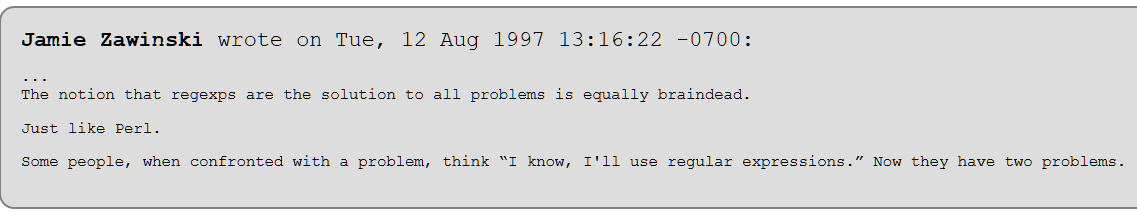

Reguläre Ausdrücke (RegEx) sind ein **mächtiges Werkzeug** ...


... aber  nicht die Lösung auf alle Probleme.


## Überblick
- Use Cases
- RegEx Einführung
    - Meta-Characters
    - Quantifiers
    - Character classes
    - Anchors
    - Groups


# Use Cases

#### Use Cases mit String-Methoden

RegEx werden zum *matchen* von Strings auf Strings verwendet.

- Prüfung, ob ein String in einem String enthalten ist
- Extrahieren von Teil-Strings aus einem String

Mit den Built-in String-Methoden ist bereits viel möglich ...

In [1]:
# Prüfung, ob ein String in einem String enthalten ist
exc = "Fatal error occured on system deathstar01"
print("Fatal error" in exc)

ok = "Successful login on system deathstar01"
print("Fatal error" in ok)

True
False


In [4]:
# Prüfen, ob ein String mit einem bestimmten String beginnt
s = "Hello World"
print(s.startswith("Hello")) # case sensitive
print(s.upper().startswith("hello")) # case insensitive

True
False


Auch "komplexere" Prüfungen sind ohne RegEx möglich ...

In [6]:
# Prüfung, ob ein Selbstlaut in einem String enthalten ist
def has_vowel(s):
    # case sensitive
    return "a" in s or "e" in s or "i" in s or "o" in s or "u" in s 

print(has_vowel("Hello World"))
print(has_vowel("zzz"))

print("-- Generator --")
# Generator expression mit built-in function any
print(any(c in "Hello World" for c in 'aeiou'))



True
False
-- Generator --
True


### Begrenzte Ausdrucksstärke
- Aufgaben sind teilweise mit "Boardmitteln" gut zu bewältigen
- Ausdrucksstärke ist insgesamt aber begrenzt

### Was tun wenn:
- Ich einen beliebigen Character matchen möchte 🥴
- 0..x Treffer eines Characters haben möchte 🤔
- Match abhängig der Positionen: z.B. Anfang der Zeile, Ende der Zeile, Wortgrenze 😧
- ...


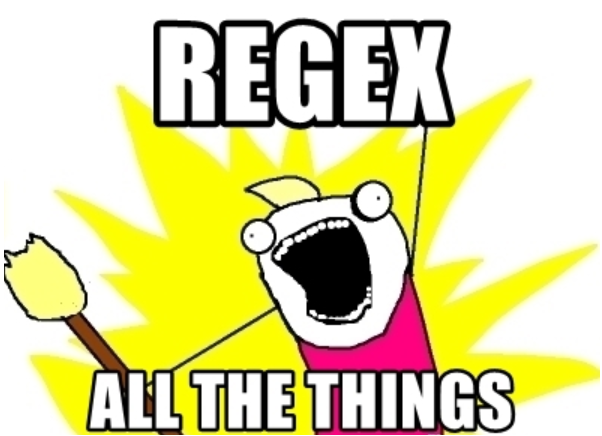

# Matching
- Meta-Characters
- Quantifiers
- Character classes
- Anchors
- Groups

## Suchen und Validieren in Text

In [7]:
# python regular expression module
import re

help(re.search)


Help on function search in module re:

search(pattern, string, flags=0)
    Scan through string looking for a match to the pattern, returning
    a Match object, or None if no match was found.



In [7]:
import re

# search(pattern, string, flags=0)
m = re.search(r"Fatal error", "Successful login to bender007")
print(m)

m = re.search(r".rror", "Random prrormessage just to annoy you.")
print(m)

None
<re.Match object; span=(7, 12), match='prror'>


### String-Prefix 'r'

In [8]:
# Mit dem String-Prefix 'r' wird ein RAW-String erzeugt
# \n ist ein 'escaped char' und steht für New-Line
print("Zeile1\nZeile2\n")
print(r"Alles in \n einer Zeile\n")

# Bei RegEx wollen wir die escaped Chars nicht interpretieren
# Daher: Bei Python immer r-Prefix verwenden

Zeile1
Zeile2

Alles in \n einer Zeile\n


Ein weiteres Beispiel

In [14]:
m = re.search(r"100€", "Der Preis beträgt 100€")
print(m)

m = re.search(r"100€", "Der Preis beträgt $100")
print(m)


<re.Match object; span=(18, 22), match='100€'>
None


In [13]:
# Geht nach wie vor auch ohne Regex
b_euro = r"100€" in "Der Preis beträgt 100€"
b_dollar = r"100€" in "Der Preis beträgt $100"

print(b_euro, b_dollar)

True False


... Was können RegEx mehr als "normales Stringmatching"? 

- Matching
- **Meta-Characters**
- Quantifiers
- Character classes
- Anchors
- Groups

### Meta Characters
---------------------
- Die meisten Characters matchen auf sich selbst: Der RegEx "test" wird genau auf den string "test" matchen
- Es gibt aber Ausnahmen: Diese Ausnahmen werden ***Meta-Characters*** genannt


    Meta Characters:
    . ^ $ * + ? { } [ ] \ | ( )
    

### Meta Character . (dot)


    Der Meta Character . matched auf ein beliebiges Zeichen
    
    Hier matched . auf: "e a 7 . !"

In [2]:
import re
print(re.search(r"gr.y", "grey"))

print(re.search(r"gr.y", "gray"))

print(re.search(r"gr.y", "gr7y"))

print(re.search(r"gr.y", "great"))

print(re.search(r"gr.y", "gr.y"))

print(re.search(r"gr.y", "gr!y"))

<re.Match object; span=(0, 4), match='grey'>
<re.Match object; span=(0, 4), match='gray'>
<re.Match object; span=(0, 4), match='gr7y'>
None
<re.Match object; span=(0, 4), match='gr.y'>
<re.Match object; span=(0, 4), match='gr!y'>


### Matchen von mehreren beliebigen Zeichen

In [22]:
print(re.search(r"gr..", "grey"))

print(re.search(r"gr..", "grad"))

print(re.search(r"gr..", "gr:43"))

# "gr" gefolgt von 4(!) beliebigen Zeichen 
print(re.search(r"gr....", "great"))


<re.Match object; span=(0, 4), match='grey'>
<re.Match object; span=(0, 4), match='grad'>
<re.Match object; span=(0, 4), match='gr:4'>
None


In [11]:
s = "Dieser Satz endet mit einem Punkt."
print(re.search(r".*\.", s))

s_2 = "Dieser Satz endet NICHT mit einem Punkt"
print(re.search(r".*\.", s_2))

<re.Match object; span=(0, 34), match='Dieser Satz endet mit einem Punkt.'>
None


### Matchen auf das Zeichen "."

    . ist ein Meta-Character und wird als beliebiges Zeichen interpretiert
    \. (ein gequoteter . durch einen Backslash) matched auf '.'

In [7]:
print(re.search(r"a.. b..", "abc bcd"))
print(re.search(r"a.. b..", "abcd bcde"))

# Was tun, wenn ich die Anzahl an zu matchenden Chars gar nicht kenne?

NameError: name 're' is not defined

### Quantifier
    Ein Quantifier spezifiziert, wie häufig ein (Meta)-Character gematched wird
    Quantifier:
    *        0..x mal
    +        1..x mal
    ?        0..1 mal
    {3}      3 mal
    {42}     42 mal
    {3,}     3..x mal
    {10,20}  10..20 mal    

  Der Quantifier wird hinter das zu matchende Zeichen gesetzt

### Beispiele mit Quantifier

In [26]:
# * matched 0..x mal

print(1, re.search(r"a.*z", "abz"))
print(2, re.search(r"a.*z", "az"))
print(3, re.search(r"a.*z", "abcdefghijklmz"))


1 <re.Match object; span=(0, 3), match='abz'>
2 <re.Match object; span=(0, 2), match='az'>
3 <re.Match object; span=(0, 14), match='abcdefghijklmz'>


In [17]:
# {3} matched 3 mal, {3, } matched 3..x mal

print(4, re.search(r"a.{3}z", "a_._z"))
print(5, re.search(r"a.{3,}z", "abz"))
print(6, re.search(r"a.*z", "abcdefghijklmz"))

4 <re.Match object; span=(0, 5), match='a_._z'>
5 None
6 <re.Match object; span=(0, 14), match='abcdefghijklmz'>


### Der Quantifier +

In [19]:
# + matched 1..x mal

print(4, re.search(r"a.+z", "abz"))
print(5, re.search(r"a.+z", "az"))

4 <re.Match object; span=(0, 3), match='abz'>
5 None


In [31]:
# ? matched 0..1 mal

print(4, re.search("a.?z", "abz"))
print(5, re.search("a.?z", "az"))
print(5, re.search("a.?z", "abcz"))

4 <re.Match object; span=(0, 3), match='abz'>
5 <re.Match object; span=(0, 2), match='az'>
5 None


... Kurz Durchatmen ...

Mit Regular Expressions die Welt retten ...
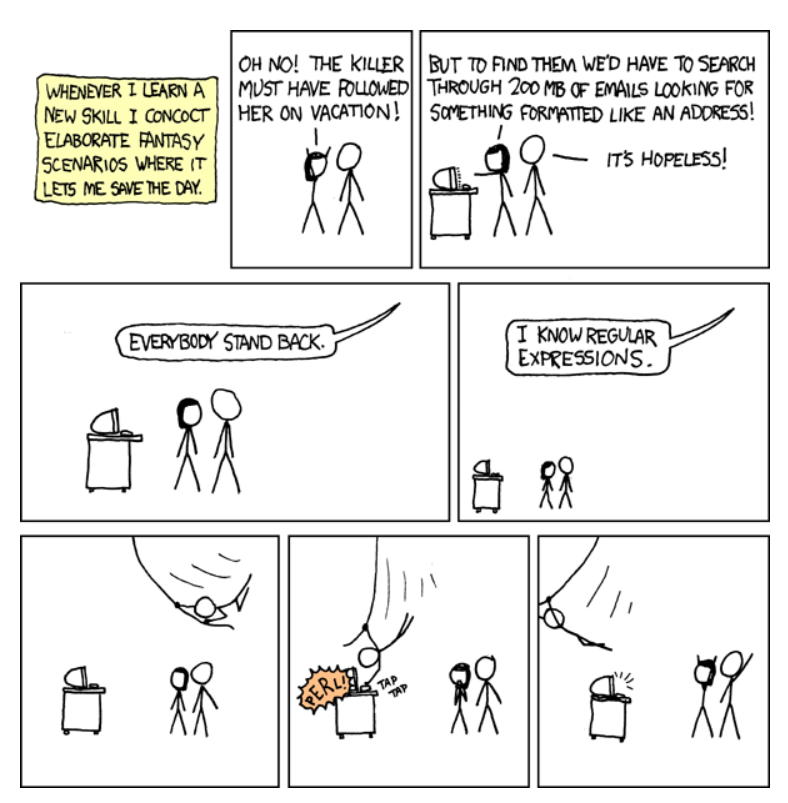

# Gemeinsame Übung 👨🏻‍💻 👩🏻‍💻 🖮



In [1]:
import re
# Validieren von Dateinamen.
# Gültige Dateinamen enthalten in unserem(!) Beispiel:
# mind. 1 beliebige Zeichen + "." + mind. 3 beliebige Zeichen

def valid_filename(filename):
    m = re.search(r".+\..{3,}", filename)
    return m is not None

assert valid_filename("test.txt") is True
assert valid_filename(".txt") is False
assert valid_filename("test") is False
assert valid_filename("test.tt") is False
assert valid_filename("test.text") is True


In [3]:
def valid_filename(filename):
    m = re.search(r".+\..{3}", filename)
    return m is not None

assert valid_filename("test.txt") is True
assert valid_filename(".txt") is False
assert valid_filename("test") is False
assert valid_filename("test.tt") is False
assert valid_filename("test.text") is True


In [5]:
import re
# eine email besteht aus:
# mind.1 beliebiges zeichen gefolgt von @ gefolgt von mind. 3 zeichen gefolgt von "." gefolgt von mind 2 zeichen
def bad_email_validator(email):
    m = re.search(r".+@.{3,}\..{2,}", email)
    return m is not None

print(bad_email_validator("peter@gmail.com") is True) # gültig
print(bad_email_validator("petergmail.com") is False) # ungültig
print(bad_email_validator("@xyz.com") is False) # ungültig
print(bad_email_validator("hugo@.com") is False) # ungültig

True
True
True
True



- Inhalt
    - Meta-Characters
    - Quantifiers
    - **Character classes**
    - Anchors
    - Groups


In [9]:
# Character classes
# Wir möchten das Beispiel has_vowel mit einem RegEx lösen
def has_vowel(s):
    # case sensitive
    return "a" in s or "e" in s or "i" in s or "o" in s or "u" in s 

m = re.search(r"[aeiou]", "kaese")
print(m)

<re.Match object; span=(1, 3), match='ae'>


### Character Classes

    Durch [] lassen sich Character Classes definieren.
    Die Character Class matched auf jedes enthaltene Element:
    [abc] --> matched auf a oder b oder c
    [xyz] --> matched auf x oder y oder z
    [0123456789] matched auf 0 oder 1 oder 2 ... oder 9

In [44]:
print(1, re.search(r"[Ff]atal", "Fatal error"))
print(2, re.search(r"[Ff]atal", "fatal error"))
print(3, re.search(r"[0123456789]{5}", "06081"))
print(4, re.search(r"[0123456789]{7}", "07231"))

1 <re.Match object; span=(0, 5), match='Fatal'>
2 <re.Match object; span=(0, 5), match='fatal'>
3 <re.Match object; span=(0, 5), match='06081'>
4 None


### Character Classes simplified

In [52]:
print(1, re.search(r"[a-z]", "x"))
print(2, re.search(r"[a-z]", "X"))
print(3, re.search(r"[a-zA-Z]", "X"))

print(4, re.search(r"[0-9]{5}", "06081"))
print(5, re.search(r"[0-9]{7}", "07231"))
print(6, re.search(r"[0-9a-zA-Z]{10}", "el1t3h4x0r"))

1 <re.Match object; span=(0, 1), match='x'>
2 None
3 <re.Match object; span=(0, 1), match='X'>
4 <re.Match object; span=(0, 5), match='06081'>
5 None
6 <re.Match object; span=(0, 10), match='el1t3h4x0r'>


### Negieren von Character Classes

In [10]:
print(1, re.search(r"[^a-z]", "123")) # matched auf alles was kein lowercase char ist
print(2, re.search(r"[^0-9]", "X")) # matched auf alles was keine Zahl ist (also auch !?. etc.)
print(3, re.search(r"[^a-cx-z]{3}", "def")) # matched auf alles was nicht abcxyz ist
print(4, re.search(r"[^a-cx-z]{3}", "abc"))
print(5, re.search(r"[^a-cx-z]{3}", "xyz"))
print(6, re.search(r"[^a-cx-z]{3}", "cde"))
print(7, re.search(r"[^a-cx-z]{3}", "ghi"))



1 <re.Match object; span=(0, 1), match='1'>
2 <re.Match object; span=(0, 1), match='X'>
3 <re.Match object; span=(0, 3), match='def'>
4 None
5 None
6 None
7 <re.Match object; span=(0, 3), match='ghi'>


"Shortcut" Character Classes
--------------------------------------------

    \w    Word: [a-zA-Z0-9_]
    \W    Non Word Character
    \d    Digit: [0-9]
    \D    Non Digit
    \s    Whitespace: Space, Tab, Newline
    \S    Non Whitespace
    ...

In [5]:
import re
# eine email besteht aus:
# mind.1 beliebigen buchstaben (lower und upper) 
# gefolgt von @ gefolgt von mind. 3 zeichen 
# gefolgt von "." 
# gefolgt von mind 2 lowercase buchstaben (keine Zahlen!) 
def bad_email_validator(email):
    m = re.search(r"[a-zA-Z]+@.{3,}\.[a-z]{2,}", email)
    return m is not None

print(bad_email_validator("peter@gmail.com") is True) # gültig
print(bad_email_validator("petergmail.com") is False) # ungültig
print(bad_email_validator("@xyz.com") is False) # ungültig
print(bad_email_validator("hugo@.com") is False) # ungültig

True
True
True
True


- Inhalt
    - Meta-Characters
    - Quantifiers
    - Character classes
    - **Anchors**
    - Groups


### Anchors

Wir möchten den Anfang eines Strings matchen

In [3]:
# Prüfen, ob ein String mit einem bestimmten String beginnt
s = "Hello World"
print(s.startswith("Hello")) # case sensitive

True


    Wie können wir dies mit einem RegEx erreichen?

In [7]:
import re

print(re.search("^Hello", "Hello World"))
print(re.search("^Hello", "Greetings. Hello and good Day, Sir!"))

<re.Match object; span=(0, 5), match='Hello'>
None


Anchors
------------

    Mit Anchors kann eine Position gematched werden.
    Eine Position ist kein Character!
    ^    Matched auf Anfang der Zeile
    $    Matched auf Ende der Zeile
    \b   Matched auf eine Wortgrenze (am Anfang oder am Ende eines Wortes)
         Matches, without consuming any characters, immediately between a character 
         matched by \w and a character not matched by \w (in either order)

### Beispiele mit Anchors

In [13]:
s = "Error on columbia01. A Fatal Error occured!"
print(re.findall(r"^Error", s))

s = "Subject: fire. Dear Sir/Madam, I am writing to inform you of a fire"
print(re.findall(r"fire$", s))

s = "A38, 42, 36, 48"
print(re.findall(r"\b[0-9]{2}\b", s))
# print(re.findall(r"[0-9]{2}", s))


['Error']
['fire']
['42', '36', '48']


# Gemeinsame Übung 👨🏻‍💻 👩🏻‍💻 🖮

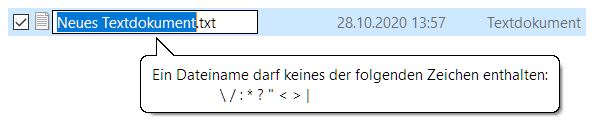

In [29]:
# Validieren von Dateinamen.
# Gültige Dateinamen enthalten in unserem(!) Beispiel:
# mind. 1 beliebiges Zeichen außer: \/:*?"<>| + "." + genau 3 beliebige Characters (kein \/:*?"<>|)

def valid_filename(filename):
    m = re.search(r"^[^\/:*?<>|]+\.", filename)
    return m is not None

assert valid_filename("test.txt") is True
assert valid_filename("1.txt") is True
assert valid_filename(".txt") is False
assert valid_filename("test") is False
assert valid_filename("test.tt") is False
assert valid_filename("test.text") is False
assert valid_filename("te:st.txt") is False
assert valid_filename("te*st.txt") is False
assert valid_filename("test.t?t") is False

AssertionError: 

In [16]:
def valid_filename(filename):
    m = re.search(r"^[^\/:*?<>|]+\.[^\/:*?<>|]{3}$", filename)
    return m is not None

assert valid_filename("test.txt") is True
assert valid_filename("1.txt") is True
assert valid_filename(".txt") is False
assert valid_filename(r"test") is False
assert valid_filename(r"test.tt") is False
assert valid_filename(r"test.text") is False
assert valid_filename(r"te:st.txt") is False
assert valid_filename(r"te*st.txt") is False
assert valid_filename(r"test.t?t") is False

## Übung: is_integer



    is_integer(string) -> bool
- Funktion soll zurückgeben, ob ein übergebener String in valider Integer ist
- Valid Integer:
    - Consists of 1 or more digits
    - May optionally begin with -
    - Does not contain any other non-digit characters.


In [18]:
import re

def is_integer(string):
    match = re.search(r"^-?\d+$", string)
    return match is not None

assert is_integer("42") is True
assert is_integer("-5000") is True
assert is_integer("-") is False
assert is_integer(" 42") is False
assert is_integer("0.0") is False
assert is_integer("+999") is False

In [34]:
def is_integer(string):
    match = re.search(r"^-?[0-9]+$", string)
    return match is not None

# das ist nur ein Beispiel
# normalerweise würde string.isnumeric() verwendet werden, matched allerdings nicht auf "-42"

## Kurze Unterbrechung ...

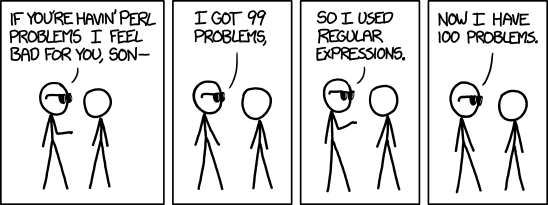

Inhalt:
- Matching
- Meta-Characters
- Quantifiers
- Character classes
- Anchors
- **Groups**



- Bisher wurde das gesamte Match-Objekt ausgegeben
- Wie können wir **nur** den Match ausgeben?

In [6]:
import re

match = re.search(r"\d{5}", "07231")
print(match.group())

#match = re.search(r"\d{10}", "07231")
#print(match.group())

07231


### Gruppen zum "Bündeln"



In [20]:
# Ein Quantifier wurde bisher nur für einen Token verwendet

m = re.search(r"abc{3}", "abccc")
print(m.group())

# Wie kann ich "abc" 3x hintereinander matchen?
m = re.search(r"abcabcabc", "abcabcabc")
print(m.group())

m = re.search(r"(abc){3}", "abcabcabc")
print(m.group())

# matche jede Kombination von abc 3x hintereinander
m = re.search(r"([abc]{3}){3}", "abccbacbca")
print(m.group())

abccc
abcabcabc
abcabcabc
abccbacbc


### Validieren von Mobiltelefonnummern 📱 📵

In [23]:
valid_1 = "+49179/123456789"
valid_2 = "0179/123456789"
invalid = "+490179/123456789"

# Tipp: (aaa|bbb) matched entweder aaa oder bbb

def is_valid(number):
    return bool(re.search(r"^(\+49|0)\d{3}/\d{9}", number))

print(is_valid(valid_1))
print(is_valid(valid_2))
print(is_valid(invalid))

True
True
False


In [22]:
def is_valid(number):
    return bool(re.search(r"^(\+49}|0)\d{3}/\d{9}$", number))

def is_valid(number):
    return bool(re.search(r"^(\+\d{5}|\d{4})/\d{9}$", number))

## Capture Groups

- Group werden standardmäßig "captured" 
- Captured = erfasst --> D.h. ich kann sie wieder auslesen

In [25]:
number = "0179/123456789"
number_2 = "+49179/123456789"
m = re.search(r"^(\+\d{5}|\d{4})/\d{9}$", number_2)
print("Valide Nummer:", m.group())
print("Vorwahl:", m.group(1))
print("Nummer:", m.group(2))

Valide Nummer: +49179/123456789
Vorwahl: +49179
Nummer: 123456789


In [35]:
number = "0179/123456789"
m = re.search(r"^(\+\d{5}|\d{4})/(\d{9})$", number)
print("Valide Nummer:", m.group())
print("Vorwahl:", m.group(1))
print("2ter Teil:", m.group(2))

Valide Nummer: 0179/123456789
Vorwahl: 0179
2ter Teil: 123456789


# Gemeinsame Übung 👨🏻‍💻 👩🏻‍💻 🖮

In [32]:
def valid_hour(string):
    # return re.search(r"[0-2][0-3]:[0-5]\d", string) is not None
    return re.search(r"([01]\d|2[0-3]):[0-5]\d", string) is not None

assert valid_hour("00:00") is True
assert valid_hour("23:59") is True
assert valid_hour("24:00") is False
assert valid_hour("25:59") is False
assert valid_hour("15:20") is True
assert valid_hour("23:60") is False

In [42]:
def valid_hour(string):
    return re.search(r"([01]\d|2[0-3}]):[0-5]\d", string) is not None

assert valid_hour("00:00") is True
assert valid_hour("23:59") is True
assert valid_hour("24:00") is False
assert valid_hour("25:59") is False
assert valid_hour("23:60") is False

    Eine Character Class matched 1 Character
    [abc] -> a oder b oder c
    
    Eine Gruppe mit Alternation matched 1..n Characters
    (aa|bb) -> aa oder bb

## Verwendung von RegExp in sonstigen Anwendungen 


egrep

# Resourcen
#### Develop and Test Regex online
- https://regex101.com

#### Cheat Sheets
- https://pycon2017.regex.training/cheat-sheet.html
- https://www.shortcutfoo.com/app/dojos/regex/cheatsheet

#### Online
- http://howardabrams.com/regexp/frames.html
- https://pycon2017.regex.training/index.html

#### Bücher
- Mastering Regular Expressions Jeffrey Friedl